In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [6]:
df = pd.read_csv('dataset/train_clean.csv')

In [7]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,58.00,1,0,55.0,1,58.80,1,270000.000000
1,2,0,79.33,1,78.33,0,1,77.48,1,1,86.5,0,66.28,1,200000.000000
2,3,0,65.00,1,68.00,1,2,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,0,56.00,1,52.00,1,1,52.00,1,0,66.0,1,59.43,0,288655.405405
4,5,0,85.80,1,73.60,1,0,73.30,0,0,96.8,0,55.50,1,425000.000000


In [8]:
df.drop(columns=['sl_no'], inplace=True)

In [9]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,0,91.00,0,0,58.00,1,0,55.0,1,58.80,1,270000.000000
1,0,79.33,1,78.33,0,1,77.48,1,1,86.5,0,66.28,1,200000.000000
2,0,65.00,1,68.00,1,2,64.00,0,0,75.0,0,57.80,1,250000.000000
3,0,56.00,1,52.00,1,1,52.00,1,0,66.0,1,59.43,0,288655.405405
4,0,85.80,1,73.60,1,0,73.30,0,0,96.8,0,55.50,1,425000.000000


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(columns=['status'], axis=1)
y = df['status']

In [15]:
model.fit(X,y)

DecisionTreeClassifier()

In [17]:
importance = model.feature_importances_

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 1.00000


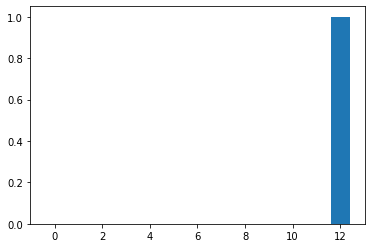

In [19]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [23]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X, y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

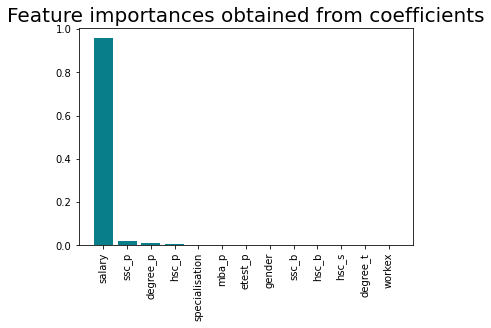

In [24]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,67.00,0,91.00,0,0,58.00,1,0,55.0,1,58.80,270000.000000
1,0,79.33,1,78.33,0,1,77.48,1,1,86.5,0,66.28,200000.000000
2,0,65.00,1,68.00,1,2,64.00,0,0,75.0,0,57.80,250000.000000
3,0,56.00,1,52.00,1,1,52.00,1,0,66.0,1,59.43,288655.405405
4,0,85.80,1,73.60,1,0,73.30,0,0,96.8,0,55.50,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,0,77.60,0,0,91.0,0,74.49,400000.000000
211,0,58.00,0,60.00,0,1,72.00,1,0,74.0,0,53.62,275000.000000
212,0,67.00,0,67.00,0,0,73.00,0,1,59.0,0,69.72,295000.000000
213,1,74.00,0,66.00,0,0,58.00,0,0,70.0,1,60.23,204000.000000


In [26]:
X['salary']

0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64

In [27]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [78]:
X_new = X[['salary','ssc_p','degree_p','ssc_p']]
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.3)

In [79]:
X_train

,salary,ssc_p,degree_p,ssc_p
71,240000.000000,75.0,71.00,75.0
86,220000.000000,62.0,64.00,62.0
29,288655.405405,62.0,58.00,62.0
59,265000.000000,52.6,72.11,52.6
116,300000.000000,68.2,66.60,68.2
...,...,...,...,...
10,260000.000000,58.0,60.00,58.0
144,288655.405405,52.0,61.00,52.0
68,288655.405405,69.7,72.70,69.7
100,288655.405405,45.0,58.00,45.0


In [80]:
# X_train = scaler.fit_transform(np.array(X_train).reshape(-1,1))
# X_test = scaler.transform(np.array(X_test).reshape(-1,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
X_train

array([[-5.76924020e-01,  6.96347956e-01,  6.08472574e-01,
         6.96347956e-01],
       [-8.11166538e-01, -5.41271113e-01, -3.40641595e-01,
        -5.41271113e-01],
       [-7.06578837e-03, -5.41271113e-01, -1.15416803e+00,
        -5.41271113e-01],
       [-2.84120874e-01, -1.43616490e+00,  7.58974964e-01,
        -1.43616490e+00],
       [ 1.25803531e-01,  4.89779813e-02,  1.18865251e-02,
         4.89779813e-02],
       [-7.06578837e-03, -2.06449458e+00,  1.69317448e+00,
        -2.06449458e+00],
       [-5.76924020e-01,  8.86750890e-01, -1.42534350e+00,
         8.86750890e-01],
       [-7.52605908e-01, -6.52637789e-02,  7.44060312e-01,
        -6.52637789e-02],
       [-4.59802762e-01,  5.05945022e-01,  1.42199900e+00,
         5.05945022e-01],
       [-1.66999615e-01,  5.05945022e-01, -6.94661180e-02,
         5.05945022e-01],
       [-4.59802762e-01, -4.46069647e-01,  2.01709359e-01,
        -4.46069647e-01],
       [ 4.22504758e+00,  5.05945022e-01,  1.69317448e+00,
      

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model_log_reg = LogisticRegression()

In [84]:
model_log_reg.fit(X_train, y_train)

LogisticRegression()

In [85]:
model_log_reg.score(X_train, y_train)

0.8333333333333334

In [86]:
model_log_reg.score(X_test, y_test)

0.8923076923076924

In [87]:
y_pred = model_log_reg.predict(X_test)

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

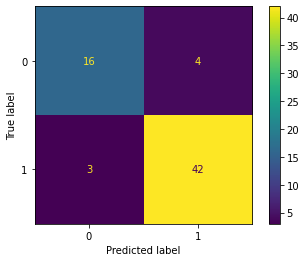

In [89]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model_dt = DecisionTreeClassifier()

In [92]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
model_dt.score(X_train, y_train)

1.0

In [94]:
model_dt.score(X_test, y_test)

0.9846153846153847

In [97]:
X_train.shape, X_test.shape

((150, 4), (65, 4))

In [98]:
y_pred = model_dt.predict(X_test)

In [99]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)

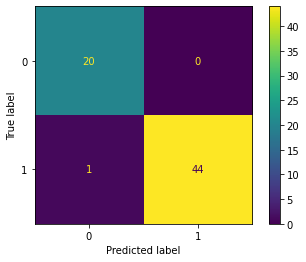

In [100]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model_rf = RandomForestClassifier()

In [103]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
model_rf.score(X_train, y_train)

1.0

In [105]:
model_rf.score(X_test, y_test)

0.9692307692307692

In [106]:
y_pred = model_rf.predict(X_test)

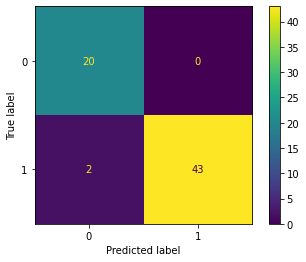

In [107]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

In [108]:
y_pred_prob = model_rf.predict_proba(X_test)

In [110]:
y_pred_prob[:,1]

array([0.  , 0.  , 1.  , 0.96, 0.03, 0.8 , 0.71, 0.85, 0.  , 1.  , 0.99,
       0.61, 0.01, 1.  , 0.05, 1.  , 0.9 , 0.  , 0.  , 0.03, 1.  , 0.2 ,
       0.96, 0.99, 1.  , 0.99, 0.99, 0.7 , 1.  , 1.  , 0.93, 0.89, 1.  ,
       0.84, 0.95, 0.  , 0.09, 0.48, 0.09, 1.  , 0.98, 0.97, 0.6 , 1.  ,
       0.99, 0.  , 0.  , 1.  , 1.  , 0.99, 0.97, 1.  , 0.99, 1.  , 0.96,
       1.  , 0.36, 0.01, 1.  , 0.1 , 0.  , 1.  , 0.8 , 0.03, 0.  ])

In [111]:
y_pred_prob[:,0]

array([1.  , 1.  , 0.  , 0.04, 0.97, 0.2 , 0.29, 0.15, 1.  , 0.  , 0.01,
       0.39, 0.99, 0.  , 0.95, 0.  , 0.1 , 1.  , 1.  , 0.97, 0.  , 0.8 ,
       0.04, 0.01, 0.  , 0.01, 0.01, 0.3 , 0.  , 0.  , 0.07, 0.11, 0.  ,
       0.16, 0.05, 1.  , 0.91, 0.52, 0.91, 0.  , 0.02, 0.03, 0.4 , 0.  ,
       0.01, 1.  , 1.  , 0.  , 0.  , 0.01, 0.03, 0.  , 0.01, 0.  , 0.04,
       0.  , 0.64, 0.99, 0.  , 0.9 , 1.  , 0.  , 0.2 , 0.97, 1.  ])

In [112]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [113]:
y_pred_prob

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.2 , 0.8 ],
       [0.29, 0.71],
       [0.15, 0.85],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.39, 0.61],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.  , 1.  ],
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.8 , 0.2 ],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.3 , 0.7 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.11, 0.89],
       [0.  , 1.  ],
       [0.16, 0.84],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.91, 0.09],
       [0.52, 0.48],
       [0.91, 0.09],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.4 , 0.6 ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  ,

In [118]:
for i in y_pred_prob[:,1]:
    if i<0.405711:
        print("0")
    else:
        print("1")

0
0
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
0
0


In [116]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)